In [1]:
import pandas as pd

In [2]:
data = pd.read_csv ('cricketers.csv',delimiter='\t')

In [3]:
data.describe()

,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.00000,109.000000,109.000000,109.000000
mean,9.559633,7.889908,173.633028,43.495413,124.669725,22.360092,122.258716,4.513761,13.894495,119.93578,3.926606,17.334862,5.149817
std,5.161164,4.982078,182.356522,29.830268,123.670265,16.093453,48.576709,5.449456,18.395495,152.80763,5.602094,21.910816,4.773435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-0.000000,0.000000
25%,5.000000,4.000000,36.000000,20.000000,33.000000,11.800000,109.090000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,10.000000,7.000000,99.000000,40.000000,76.000000,21.160000,130.260000,2.000000,3.000000,27.00000,0.000000,0.000000,7.280000
75%,14.000000,13.000000,260.000000,62.000000,188.000000,30.000000,146.040000,8.000000,26.000000,223.00000,6.000000,28.360000,9.230000
max,17.000000,17.000000,735.000000,128.000000,516.000000,75.830000,300.000000,17.000000,68.000000,533.00000,24.000000,108.000000,16.500000


#1 Feature Scaling [2 points]

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
min_max_scaler = MinMaxScaler()

In [6]:
data_scaled = min_max_scaler.fit_transform(data.iloc[:,1:])

In [7]:
data_final = pd.DataFrame.from_records(data_scaled)

In [8]:
data_final.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,0.562331,0.464112,0.236235,0.339808,0.241608,0.294871,0.407529,0.265515,0.204331,0.225020,0.163609,0.160508,0.312110
std,0.303598,0.293063,0.248104,0.233049,0.239671,0.212231,0.161922,0.320556,0.270522,0.286693,0.233421,0.202878,0.289299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.294118,0.235294,0.048980,0.156250,0.063953,0.155611,0.363633,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.588235,0.411765,0.134694,0.312500,0.147287,0.279045,0.434200,0.117647,0.044118,0.050657,0.000000,0.000000,0.441212
75%,0.823529,0.764706,0.353741,0.484375,0.364341,0.395622,0.486800,0.470588,0.382353,0.418386,0.250000,0.262593,0.559394
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#2 Run K-means from scratch using attributes using average_runs and bowling_economy [3 points]

In [9]:
X = data_final.iloc[:, [5, 12]].values  #Filter desired attributes

In [10]:
X.shape

(109, 2)

In [11]:
X

array([[0.22088883, 0.        ],
       [0.70328366, 0.        ],
       [0.83080575, 0.        ],
       [0.3753132 , 0.        ],
       [0.32520111, 0.        ],
       [0.56705789, 0.        ],
       [0.37874192, 0.56848485],
       [0.0702888 , 0.48484848],
       [0.17578795, 0.50787879],
       [0.31649743, 0.59878788],
       [0.21535013, 0.49575758],
       [0.08571805, 0.46424242],
       [0.27904523, 0.        ],
       [0.32968482, 0.56      ],
       [0.53910062, 0.        ],
       [0.43162337, 0.        ],
       [0.60662007, 0.61878788],
       [0.11209284, 0.62787879],
       [0.34550969, 0.52121212],
       [0.16616115, 0.        ],
       [0.07464064, 0.80363636],
       [0.21653699, 0.38363636],
       [0.17143611, 0.5169697 ],
       [0.48793354, 0.        ],
       [0.21970196, 0.44121212],
       [0.28682579, 0.48484848],
       [0.65673216, 0.        ],
       [0.4648556 , 0.60363636],
       [0.3874456 , 0.        ],
       [0.42727153, 0.        ],
       [0.

In [12]:
import random
class K_Means:
    def __init__(self, k=2, tol=0.00001, max_iter=300, verbose='n', init_strategy='default'):
        self.k = k
        self.tolerance = tol
        self.max_iters = max_iter
        self.verbose = verbose
        self.init_strategy = init_strategy

    def fit(self,data):

        self.centroids = {}

        if (self.verbose == 'y'):
            print ('Initial centroids are:')
            
        for i in range(self.k):
            if (self.init_strategy == 'random'):   # random strategy
                j = random.randint(0, len(data))
                self.centroids[i] = data[j]
            else:                                  # default strategy
                self.centroids[i] = data[i]
            if (self.verbose == 'y'):
                print (self.centroids[i][0])
                print (',')
                print (self.centroids[i][1])

        for i in range(self.max_iters):
            self.classifications = {}

            for j in range(self.k):
                self.classifications[j] = []

            for featureset in X:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                if (self.verbose == 'y'):
                    print ('i=',i)
                    print (self.centroids[c][0],',',self.centroids[c][1])                   
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tolerance:
                    #print('info', np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                return i # number of iterations when covergence was achieved
                #break

    def predict(self,samples):
        classification = []
        for data in samples :
            distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
            classification.append(distances.index(min(distances)))
        return classification
    
    def getCentroids(self) :
        return np.array(list(self.centroids.values()))

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
def displayClusters(K) :
    kmeans = K_Means(k=K)
    kmeans.fit(X)
    cluster = kmeans.predict(X)
    #print(kmeans.getCentroids())
    plt.scatter( X[:,0],X[:,1],c=cluster,cmap='rainbow')
    plt.scatter(kmeans.getCentroids()[:,0], kmeans.getCentroids()[:,1], color='black')
    plt.xlabel('Average Runs Scored')
    plt.ylabel('Bowling Economy')
    plt.title('Clustring with Cluster Size K ='+ str(K))

In [15]:
def getInfo(K,s):
    if (s == 1):
        kmeans = K_Means(k=K,verbose='n',init_strategy='random')
    else:
        kmeans = K_Means(k=K,verbose='n')
    itrs = kmeans.fit(X)
    print ('iterations:', itrs)

In [16]:
getInfo(2,0)

iterations: 4


C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide


In [17]:
getInfo(2,1)

iterations: 1


C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide


#1 (a) Which strategy achieves better convergence (iterations count) ? Draw bar plot (X-axis has different strategies and Y-axis has iterations count).  [2 points]    

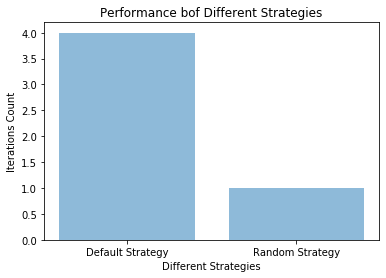

In [18]:
import numpy as np
import matplotlib.pyplot as plt

strategies = ('Default Strategy', 'Random Strategy')
y_pos = np.arange(len(strategies))
iterations = [4,1]

plt.bar(y_pos, iterations, align='center', alpha=0.5)
plt.xticks(y_pos, strategies)
plt.xlabel('Different Strategies')
plt.ylabel('Iterations Count')
plt.title('Performance bof Different Strategies')

plt.show()

Note that different runs will give different values, it is okay as long as student has figured out a way to output number of iterations from either their own implementation or existing library function.

If a student has used existing library function also and the parameter provided by it, that is also fine.

Any other strategy implemented by student is also fine.

#1 (b) Is it true for other values of K = 3,4,5,6 ? On the same bar plot, draw bars with different colors for these different values of K. [2 points]     

In [19]:
getInfo(3,0)

iterations: 4


C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide


In [20]:
getInfo(3,1)

iterations: 0


In [21]:
getInfo(4,0)

iterations: 4


C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide


In [22]:
getInfo(4,1)

iterations: 1


C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide


In [23]:
getInfo(5,0)

iterations: 5


C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide


In [24]:
getInfo(5,1)

iterations: 5


C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide


In [25]:
getInfo(6,0)

iterations: 3


C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\risha\Anaconda3\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\risha\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide


In [26]:
getInfo(6,1)

iterations: 2


C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide


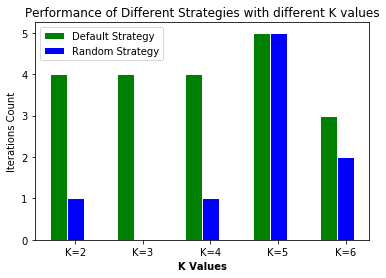

In [27]:
# Drawing bar plot (X-axis has different strategies and Y-axis has iterations count) for Different values of k i.e. K=2,3,4,5,6
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [4, 4, 4, 5, 3]
bars2 = [1, 0, 1, 5, 2]

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, color='green', width=barWidth, edgecolor='white', label='Default Strategy')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Random Strategy')

 
# Add xticks on the middle of the group bars
plt.xlabel('K Values', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['K=2', 'K=3', 'K=4', 'K=5', 'K=6'])
plt.ylabel('Iterations Count')
plt.title('Performance of Different Strategies with different K values')
 
# Create legend & Show graphic
plt.legend()
plt.show()

Random strategy performs better in most of the cases, but this is needs to empirically evaluated for many runs. So, it is okay, if student are getting any values, as long as they know how to computer number of iterations for convergence.

#2 Use the elbow method to find the best value of K. Consider four attributes runs_scored, average_runs, wickets_obtained, bowling_economy.   Plot the related graph as discussed in the video lecture. [2 points]

In [28]:
X = data_final.iloc[:, [2, 5, 10, 11]].values

In [29]:
X

array([[0.18231293, 0.22088883, 0.        , 0.        ],
       [0.65306122, 0.70328366, 0.        , 0.        ],
       [0.08571429, 0.83080575, 0.        , 0.        ],
       [0.50340136, 0.3753132 , 0.        , 0.        ],
       [0.20136054, 0.32520111, 0.        , 0.        ],
       [0.81904762, 0.56705789, 0.        , 0.        ],
       [0.42993197, 0.37874192, 0.54166667, 0.25277778],
       [0.04353741, 0.0702888 , 1.        , 0.17277778],
       [0.10884354, 0.17578795, 0.125     , 0.67277778],
       [0.13061224, 0.31649743, 0.08333333, 0.77777778],
       [0.26666667, 0.21535013, 0.33333333, 0.35064815],
       [0.01768707, 0.08571805, 0.375     , 0.36416667],
       [0.17278912, 0.27904523, 0.        , 0.        ],
       [0.10204082, 0.32968482, 0.20833333, 0.17407407],
       [0.50068027, 0.53910062, 0.        , 0.        ],
       [0.66802721, 0.43162337, 0.        , 0.        ],
       [0.06258503, 0.60662007, 0.125     , 0.4412963 ],
       [0.02312925, 0.11209284,

In [30]:
from sklearn.cluster import KMeans

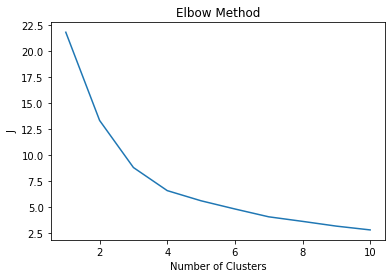

In [31]:
jtheta = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=200, n_init=12, random_state=0)
    kmeans.fit(X)
    jtheta.append(kmeans.inertia_)
plt.plot(range(1, 11), jtheta)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('J')
plt.show()

K=4 could be considered as the knee point

# 3

Your task is to create a team comprising 4 batsmen, 4 bowlers, and 3 all-rounders.  Use appropriate K value. Consider two attributes runs_scored and wickets_obtained. Take the criteria for selecting top batsmen on the basis of runs_scored, top bowlers on the basis of wickets_obtained and top all-rounders on the basis of average of runs_scored and wickets_obtained.  

(a) Output the names of cricketers who got selected in your team. [2 points]    

(b) Draw a scatter plot with runs_scored and wickets_obtained on X-axis and Y-axis, respectively. Each selected cricketer as a data point (solid circle), use different colors for batsman, bowler and all-rounder.   [2 points]

In [34]:
X = data_final.iloc[:,[2, 10]].values

In [38]:
K = 3
kmeans = KMeans(n_clusters=K, init='k-means++', max_iter=100, n_init=10, random_state=0)

No handles with labels found to put in legend.


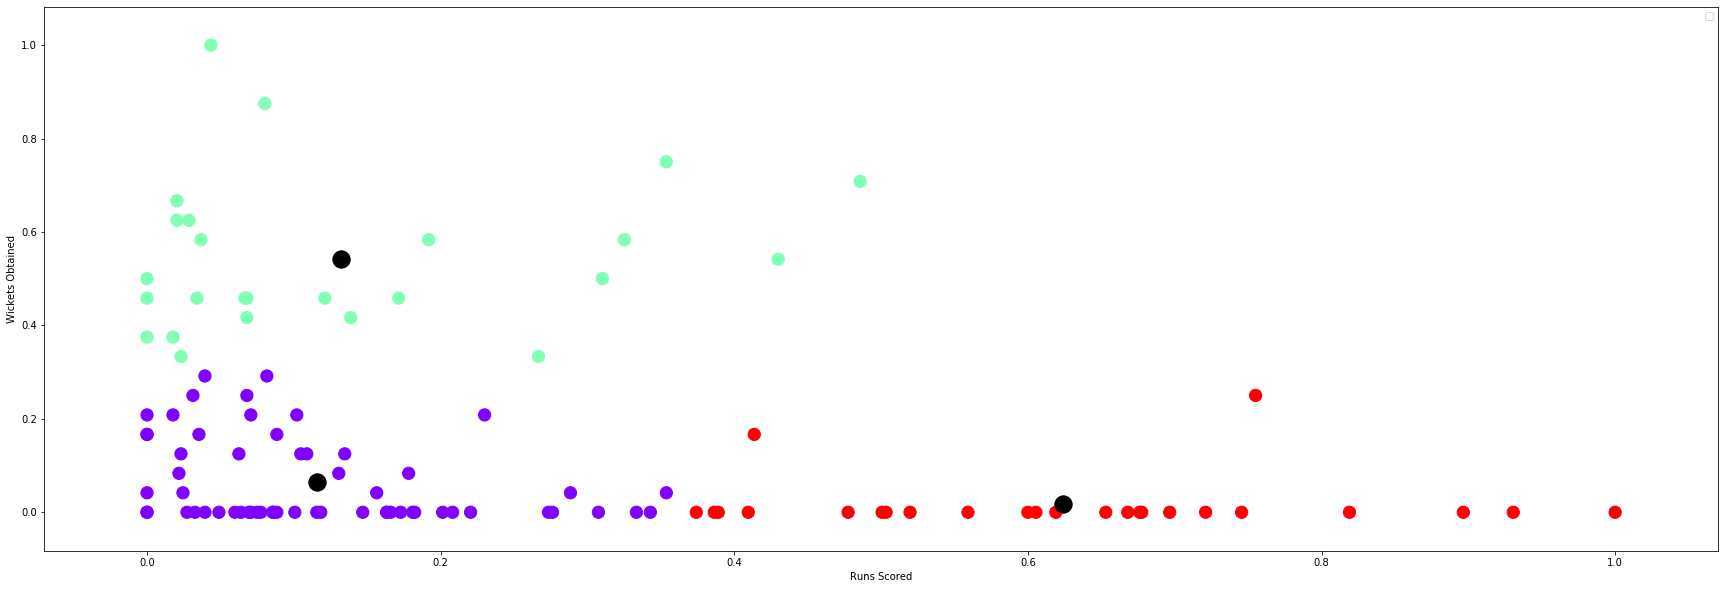

In [39]:
kmeans.fit(X)
centroids = kmeans.cluster_centers_

plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow',s=150)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=300)
plt.xlabel('Runs Scored')
plt.ylabel('Wickets Obtained')
plt.legend()
fig= plt.gcf()
fig.set_size_inches(30, 10)
plt.show()

Here, The red dots representing batsmans and the green dots representing the baller. To get the all-rounders we will see purpule dots. This way we can select top 4 batsman from red dots, top 4 bowlers from green dots and for 3 all-rounders from purple dots.

In [59]:
df = pd.DataFrame(X)

In [62]:
df.rename(columns = {0:'runs_scored',1:'wickets_obtained'}, inplace = True) 

In [63]:
df

,runs_scored,wickets_obtained
0,0.182313,0.000000
1,0.653061,0.000000
2,0.085714,0.000000
3,0.503401,0.000000
4,0.201361,0.000000
...,...,...
104,0.000000,0.041667
105,0.000000,0.166667
106,0.000000,0.166667
107,0.000000,0.208333


In [64]:
 df[2] = pd.Series(kmeans.labels_, index=df.index)

In [65]:
df.rename(columns = {2:'cluster_id'}, inplace = True) 

In [66]:
df

,runs_scored,wickets_obtained,cluster_id
0,0.182313,0.000000,0
1,0.653061,0.000000,2
2,0.085714,0.000000,0
3,0.503401,0.000000,2
4,0.201361,0.000000,0
...,...,...,...
104,0.000000,0.041667,0
105,0.000000,0.166667,0
106,0.000000,0.166667,0
107,0.000000,0.208333,0


In [72]:
df['player'] = data['PLAYER']

In [73]:
df

,runs_scored,wickets_obtained,cluster_id,player
0,0.182313,0.000000,0,Aaron Finch
1,0.653061,0.000000,2,AB de Villiers
2,0.085714,0.000000,0,Abhishek Sharma
3,0.503401,0.000000,2,Ajinkya Rahane
4,0.201361,0.000000,0,Alex Hales
...,...,...,...,...
104,0.000000,0.041667,0,Anureet Singh
105,0.000000,0.166667,0,Avesh Khan
106,0.000000,0.166667,0,Barinder Sran
107,0.000000,0.208333,0,Basil Thampi


In [75]:
df.sort_values(['runs_scored'],ascending = False).head(4) 

,runs_scored,wickets_obtained,cluster_id,player
42,1.000000,0.0,2,Kane Williamson
73,0.930612,0.0,2,Rishabh Pant
48,0.896599,0.0,2,Lokesh Rahul
5,0.819048,0.0,2,Ambati Rayudu


In [81]:
df[df['cluster_id']==2].sort_values(['runs_scored'],ascending = False).head(4) 

,runs_scored,wickets_obtained,cluster_id,player,average_performance
42,1.000000,0.0,2,Kane Williamson,0.500000
73,0.930612,0.0,2,Rishabh Pant,0.465306
48,0.896599,0.0,2,Lokesh Rahul,0.448299
5,0.819048,0.0,2,Ambati Rayudu,0.409524


In [76]:
df.sort_values(['wickets_obtained'],ascending = False).head(4) 

,runs_scored,wickets_obtained,cluster_id,player
7,0.043537,1.000000,1,Andrew Tye
69,0.080272,0.875000,1,Rashid Khan
33,0.353741,0.750000,1,Hardik Pandya
89,0.485714,0.708333,1,Sunil 0rine


In [82]:
df[df['cluster_id']==1].sort_values(['wickets_obtained'],ascending = False).head(4) 

,runs_scored,wickets_obtained,cluster_id,player,average_performance
7,0.043537,1.000000,1,Andrew Tye,0.521769
69,0.080272,0.875000,1,Rashid Khan,0.477636
33,0.353741,0.750000,1,Hardik Pandya,0.551871
89,0.485714,0.708333,1,Sunil 0rine,0.597024


In [77]:
df['average_performance'] = df[['runs_scored', 'wickets_obtained']].mean(axis=1)

In [78]:
df

,runs_scored,wickets_obtained,cluster_id,player,average_performance
0,0.182313,0.000000,0,Aaron Finch,0.091156
1,0.653061,0.000000,2,AB de Villiers,0.326531
2,0.085714,0.000000,0,Abhishek Sharma,0.042857
3,0.503401,0.000000,2,Ajinkya Rahane,0.251701
4,0.201361,0.000000,0,Alex Hales,0.100680
...,...,...,...,...,...
104,0.000000,0.041667,0,Anureet Singh,0.020833
105,0.000000,0.166667,0,Avesh Khan,0.083333
106,0.000000,0.166667,0,Barinder Sran,0.083333
107,0.000000,0.208333,0,Basil Thampi,0.104167


In [79]:
df.sort_values(['average_performance'],ascending = False).head(3) 

,runs_scored,wickets_obtained,cluster_id,player,average_performance
89,0.485714,0.708333,1,Sunil 0rine,0.597024
33,0.353741,0.750000,1,Hardik Pandya,0.551871
7,0.043537,1.000000,1,Andrew Tye,0.521769


In [83]:
df[df['cluster_id']==0].sort_values(['average_performance'],ascending = False).head(3) 

,runs_scored,wickets_obtained,cluster_id,player,average_performance
31,0.229932,0.208333,0,Glenn Maxwell,0.219133
98,0.353741,0.041667,0,Yusuf Pathan,0.197704
34,0.081633,0.291667,0,Harshal Patel,0.186650
